In [28]:
"""
Actividad realizada por: Kevin Santiago Perez Cevallos
"""

# Llamado de librerias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score

# Obtencion de los datos
url = "https://raw.githubusercontent.com/selva86/datasets/master/Advertising.csv"

df = pd.read_csv(url, sep=",")

print("Primeras filas del dataset:")
print(df.head())

Primeras filas del dataset:
      TV  radio  newspaper  sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9


### Visualizacion del conjunto de datos
1. Primero se identifico que el separador del conjunto de datos en el csv es una coma y luego de la impresion del dataframe se observa que se tiene 3 variables independientes (TV, radio y newspaper) y una variable dependiente o dato etiquetado (sales).

In [29]:
# Verificacion de la inexistencia de valores nulos
print("Verificacion de valores nulos:")
print(df.isnull().sum())

# Eliminacion de la columna Unnmaed: 0
df = df.drop('Unnamed: 0', axis=1)

Verificacion de valores nulos:
TV           0
radio        0
newspaper    0
sales        0
dtype: int64


### Identificacion de columnas con valores nulos
2. Se identifico que dentro del conjunto de datos no existen valores nulos por lo que no se podria llevar a cabo la inputacion.

In [30]:
# Division del conjunto de datos en variables independientes (X) y dependientes (y)
X = df.drop("sales", axis=1)
y = df["sales"]



# Division de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Datos de entrenamiento: {X_train.shape}")
print(f"Datos de prueba: {X_test.shape}")


Datos de entrenamiento: (160, 3)
Datos de prueba: (40, 3)


### Division del conjunto de datos
3. Para la division del conjunto de datos, primero en X se guardaron las variables independientes y en y la variable dependiente para luego dividir el 80% para entrenamiento y 20% en prueba.

In [31]:
# Escalado de las caracteristicas y normalizacion
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Escalamiento del conjunto de datos dependientes
4. Se escalan los datos de entrenamiento y prueba para que tengan un rango de valores similares

In [32]:
# Creacion y entrenamiento del modelo de regresion lineal multiple
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predicciones del los datos de prueba
y_pred = model.predict(X_test)

print("Predicciones del modelo:")
print(y_pred[:5])



Predicciones del modelo:
[16.4080242  20.88988209 21.55384318 10.60850256 22.11237326]


### Creacion, entrenamiento y prueba del modelo de regresion lineal multiple
5. Se creo el modelo con los datos de entrenamientoy posterior se hizo predicciones para posterior hacer la comparacion entre los valores obtenidos con los reales.

In [33]:
# Evaluacion del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Error cuadratico medio (MSE): {mse}")
print(f"Raiz del error cuadratico medio (RMSE): {rmse}")
print(f"R^2 Score: {r2}")



Error cuadratico medio (MSE): 3.174097353976106
Raiz del error cuadratico medio (RMSE): 1.7815996615334506
R^2 Score: 0.8994380241009119


### Evaluacion del modelo de regresion lineal multiple
6. Se usaron varios metodos para validar que el rendimiento del modelo de regresion lineal multiple, lo cual resulto que el modelo tiene un rendimiento optimo, ya que el modelo explica el 89.8% de la variablidad de las variables dependientes.

In [34]:
# Calculo de los residuos
residuos = y_test - y_pred

print("Primeras 5 observaciones de los residuos:")
print(residuos.head())

print(y_test.values[1])
print(y_pred[1])

Primeras 5 observaciones de los residuos:
95     0.491976
15     1.510118
30    -0.153843
158   -3.308503
128    2.587627
Name: sales, dtype: float64
22.4
20.88988208714789


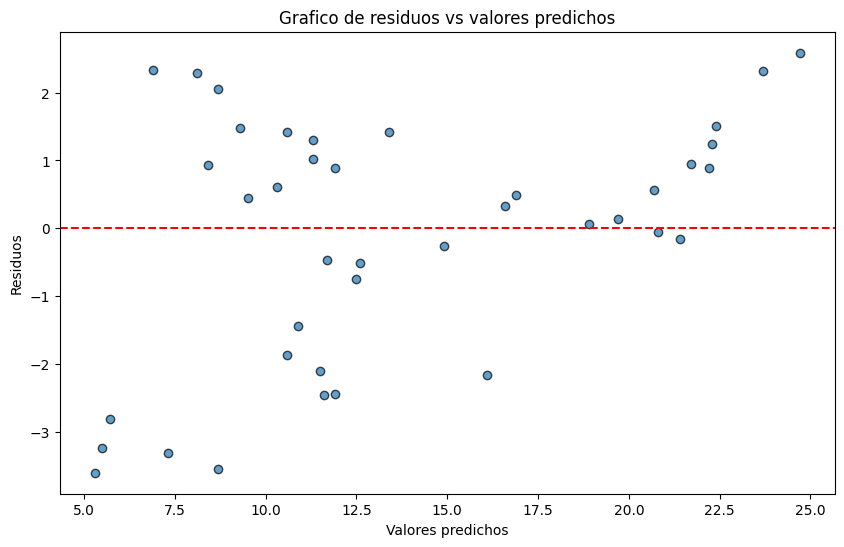

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuos, alpha=0.7, edgecolors='k')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Valores predichos")
plt.ylabel("Residuos")
plt.title("Grafico de residuos vs valores predichos")
plt.show()

### Analisis del grafico
7. Se puede observar que en los valores pequeños y grandes tienen un mayor distancia con respecto a cero que los valores centrales, esto podria indicar que la mayor concentracion de los datos estan en medio mientras que los extremos que son los valores pequeños y grandes no cuentan con tantos datos para obtener un mejor rendimiento por parte del modelo.